#### **Combined Cycle Power Plant (CCPP) Energy Output Prediction Project Outline**

1. Project Overview

1.1 Objective
Develop a predictive model to forecast the hourly electrical energy output of a Combined Cycle Power Plant (CCPP) based on ambient environmental conditions.

1.2 Business Outcome
Optimizing the predictive accuracy of energy output enables better demand forecasting, potentially reducing operational costs and enhancing the efficiency of power resource allocation.

1.3 Project Scope
Dataset: Hourly readings from CCPP sensors, including:
Temperature (°C)
Ambient Pressure (milibar)
Relative Humidity (%)
Exhaust Vacuum (cm Hg)
Target Variable: Net hourly electrical energy output (MW)
Modeling Tools: Python (pandas, scikit-learn, XGBoost)

2. Machine Learning Modeling Approach

2.1 Task Identification
Type of Task: Regression task (predicting a continuous target variable, MW energy output)
Features Selection: Use all ambient variables to predict the power output (Temperature, Ambient Pressure, Relative Humidity, Exhaust Vacuum).
Algorithms: Random Forest and XGBoost are selected for their robust handling of regression tasks and capacity for fine-tuning.

2.2 Evaluation Metric
Define a reasonable output metric for assessing model performance:
Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and R-squared (R²): Selected metrics for evaluating model accuracy, sensitivity to outliers, and model fit, respectively.

3. Data Preparation:

3.1 Data Loading and Exploration
Load data using pandas and examine structure, data types, and null values.
Visualize each feature’s range and distribution to understand potential patterns or anomalies.

3.2 Data Preprocessing
Splitting: Divide data into training, validation, and test sets using an 80-10-10 split or cross-validation strategy.
Feature Engineering: Analyze and prepare features as needed (e.g., normalization or scaling).

4. Model Building

4.1 Model Training and Comparison
Train and compare at least two models using different algorithms and hyperparameters to optimize for predictive performance:

Random Forest: Baseline model with default settings, followed by hyperparameter tuning (e.g., n_estimators, max_depth).
XGBoost: Model tuned using cross-validation, adjusting parameters like learning_rate, n_estimators, max_depth, and colsample_bytree.
Evaluate models using cross-validation or a validation set.

4.2 Hyperparameter Tuning
Use grid search or randomized search to find optimal values for hyperparameters, improving model performance through refined parameter selection.

5. Model Evaluation:

5.1 Test Set Evaluation
Assess the final model on the test set using the chosen evaluation metrics (MAE, RMSE, R²) to ensure model generalizability and accuracy.
5.2 Performance Interpretation
Communicate Results: Present evaluation metrics clearly, explaining how the selected model meets the project’s goals in terms of accuracy and reliability.

6. Model Interpretation:

6.1 Feature Importance Analysis
Use feature importance (e.g., from Random Forest or SHAP for XGBoost) to interpret the significance of each feature in the model’s prediction.

6.2 Presentation and Explanation
Modeling Approach: Explain the choice of Random Forest and XGBoost, feature selection, and task type.
Model Building: Describe model comparisons, validation strategy, and tuning process.
Model Evaluation: Present final metrics on test set, validating model performance.
Model Interpretation: Discuss feature importance and implications for CCPP energy optimization.

7. Project Submission and Peer Review
Prepare a concise video presentation covering:
Modeling Approach
Model Building
Model Evaluation
Model Interpretation
Deliverables:

Jupyter Notebook with code, explanations, and visualizations.
Video presentation for peer review, ensuring clarity on model choice, evaluation metrics, and project objectives.


#### **Data Loading and Initial Exploration**

In this section, we load the CCPP dataset and conduct an initial exploration to understand the structure and distribution of each feature.

Code Description
Data Loading: The dataset is loaded from the specified file path using pandas.
Data Overview: We examine the first few rows, data types, missing values, and summary statistics of each column.
Visualization: We plot the distribution of each feature to gain insights into their ranges and patterns.
Output Summary
Data Structure: The dataset contains five columns: Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH), and Electrical Energy Output (PE).
Data Types: All columns are of float64 type, indicating numerical continuous data.
Missing Values: No missing values are present in the dataset.
Feature Distributions: Visualizations reveal distinct patterns for each feature. For example, Temperature (AT) and Relative Humidity (RH) exhibit bimodal distributions, while Ambient Pressure (AP) and Electrical Energy Output (PE) have normal-like distributions.
This initial exploration sets the foundation for further data preparation and modeling steps.



First five rows of the dataset:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

Data types of each column:
AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

Missing values in each column:
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Summary statistics of the dataset:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.55000

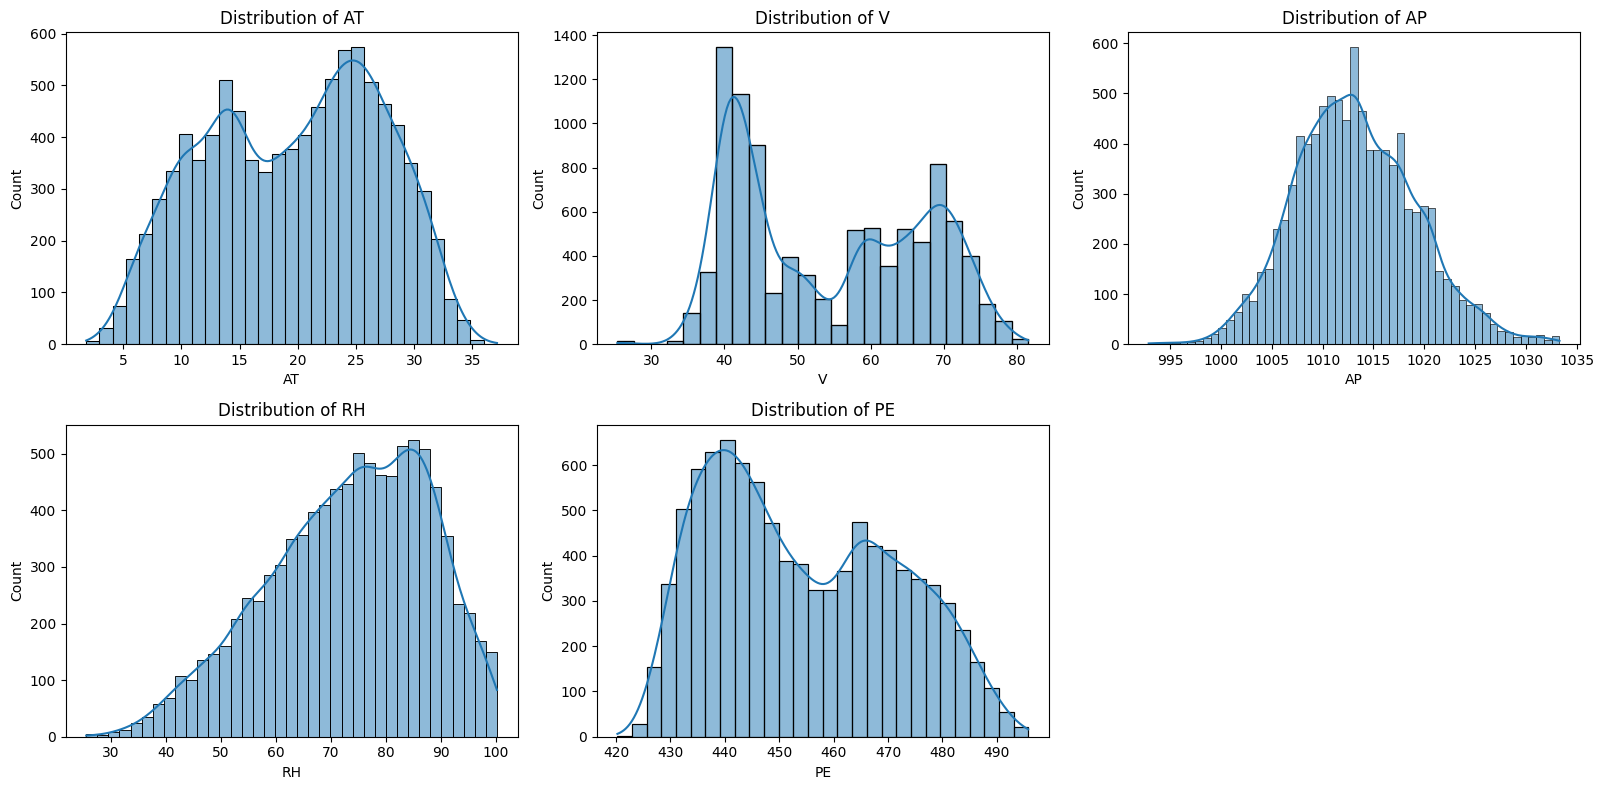

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

file_path = '/Users/steventuschman/Desktop/CCPP_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("First five rows of the dataset:")
print(data.head())

# Display the data types of each column
print("\nData types of each column:")
print(data.dtypes)

# Check for any missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())

# Visualize the distribution of each feature
plt.figure(figsize=(16, 8))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()




#### **Data Preprocessing: Splitting and Scaling**

Code Summary
Data Splitting: The dataset is split into training, validation, and test sets using an 80-10-10 ratio:
Training Set: Used to train the model.
Validation Set: Used to tune the model and evaluate performance during development.
Test Set: Held out for final model evaluation.
Feature Scaling: We apply StandardScaler to normalize the features, ensuring each feature has a mean of 0 and a standard deviation of 1. Scaling helps improve model performance, especially for algorithms sensitive to feature scales.
Output Summary
Training Set Size: 7,654 samples, Validation Set Size: 957 samples, Test Set Size: 957 samples.
Scaled Features: The first five rows of the scaled training set display normalized values for each feature (AT, V, AP, RH), showing that scaling has been successfully applied.
This preprocessing step prepares the data for model training and evaluation, with standardized features and separate sets to avoid data leakage.

In [4]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target variable (y)
X = data.drop(columns=['PE'])  # All columns except 'PE' as features
y = data['PE']  # 'PE' is the target variable

# Split the data into training (80%), validation (10%), and test sets (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

# Feature Scaling - Normalize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set, then transform training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrames for easier viewing (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the first few rows of the scaled training set (optional)
print("\nFirst five rows of the scaled training set:")
print(X_train_scaled.head())


Training set size: (7654, 4)
Validation set size: (957, 4)
Test set size: (957, 4)

First five rows of the scaled training set:
         AT         V        AP        RH
0  0.308843 -0.412584 -0.666930  1.040508
1 -1.147903 -1.088494  2.054671  0.111165
2 -1.497630 -1.153016  1.311193  0.984432
3 -1.102170 -0.746211  0.029450  0.622680
4 -0.315285 -1.123115 -1.036987  0.061929


#### **Random Forest Model Training and Evaluation**

Random Forest Model Overview
Random Forest is an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting. By combining the predictions of numerous weak learners (individual decision trees), Random Forest achieves robust performance, particularly on regression tasks like predicting energy output in a Combined Cycle Power Plant.

Model Training and Tuning
Baseline Model: A Random Forest model with default settings was trained and evaluated using 5-fold cross-validation.

Baseline MAE (5-fold CV): 2.48. This serves as the initial benchmark.
Hyperparameter Tuning: We performed grid search on three hyperparameters:

n_estimators: Number of trees in the forest, set to 300 for the best model.
max_depth: Maximum depth of each tree, optimized to 20.
min_samples_split: Minimum samples required to split a node, optimized to 2.
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Model Evaluation: The optimized Random Forest model was evaluated on the validation set using three metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

Output Summary and Metric Definitions
Mean Absolute Error (MAE): The average absolute difference between actual and predicted values. It provides a straightforward interpretation of error in the same units as the target variable (MW).

MAE: 2.36 MW
Interpretation: On average, the model’s predictions are within ±2.36 MW of the actual energy output.
Root Mean Squared Error (RMSE): The square root of the average squared differences between actual and predicted values. RMSE penalizes larger errors more heavily than MAE and gives insight into the model's precision.

RMSE: 3.19 MW
Interpretation: The model’s predictions have a typical error of about 3.19 MW, with higher weight given to larger deviations.
R-squared (R²): A statistical measure of how well the model explains the variance in the target variable, with values closer to 1 indicating better performance.

R²: 0.965
Interpretation: The model explains approximately 96.5% of the variance in energy output, indicating a strong fit.
Interpretation of Results
Model Improvement: Hyperparameter tuning slightly improved the model's performance, reducing the MAE from 2.48 to 2.36 MW.
Prediction Accuracy: The low MAE and RMSE, combined with a high R², suggest that the tuned Random Forest model performs well in predicting the power plant’s energy output based on ambient conditions.
Next Steps: The next step involves training an XGBoost model and comparing its performance to the Random Forest model to determine the best algorithm for this prediction task.
This step demonstrates the effectiveness of Random Forest for regression tasks, especially when paired with careful tuning of hyperparameters.

In [5]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Baseline Random Forest model with default settings
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_train_scaled, y_train)

# Evaluate baseline model using cross-validation
baseline_scores = cross_val_score(rf_baseline, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
baseline_mae = -baseline_scores.mean()
print("Baseline Random Forest Model MAE (5-fold CV):", baseline_mae)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestRegressor with GridSearchCV
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
rf_grid.fit(X_train_scaled, y_train)

# Best parameters and performance of the tuned model
print("Best Parameters for Random Forest:", rf_grid.best_params_)
best_rf_model = rf_grid.best_estimator_

# Evaluate the tuned model on the validation set
y_val_pred = best_rf_model.predict(X_val_scaled)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
val_r2 = r2_score(y_val, y_val_pred)

print("\nTuned Random Forest Model Performance on Validation Set:")
print("MAE:", val_mae)
print("RMSE:", val_rmse)
print("R²:", val_r2)


Baseline Random Forest Model MAE (5-fold CV): 2.479430529680717
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}

Tuned Random Forest Model Performance on Validation Set:
MAE: 2.361225052198477
RMSE: 3.1916264889612225
R²: 0.9647897179506126


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### **XGBoost Model Training and Evaluation**

XGBoost Model Overview
XGBoost is a powerful gradient-boosting algorithm that builds an ensemble of decision trees, optimizing each tree iteratively based on the errors of the previous ones. This method is particularly effective for regression tasks, as it minimizes errors through adaptive boosting and provides flexibility through hyperparameter tuning.

Model Training and Tuning
Baseline Model: An initial XGBoost model with default settings was trained and evaluated using 5-fold cross-validation.

Baseline MAE (5-fold CV): 2.34. This serves as the benchmark for comparison.
Hyperparameter Tuning: We performed grid search on four key hyperparameters:

n_estimators: Number of boosting rounds, optimized to 300.
max_depth: Maximum depth of each tree, optimized to 7.
learning_rate: Step size shrinkage, optimized to 0.1 to balance learning speed and overfitting.
colsample_bytree: Fraction of features (columns) sampled for each tree, set to 1.0.
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Tuned Model Evaluation: The optimized XGBoost model was evaluated on the validation set using three metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

Output Summary and Metric Definitions
Mean Absolute Error (MAE): The average absolute difference between actual and predicted values. This metric provides a straightforward interpretation of error in the same units as the target variable (MW).

MAE: 2.07 MW
Interpretation: On average, the XGBoost model’s predictions are within ±2.07 MW of the actual energy output, indicating improved accuracy over the baseline.
Root Mean Squared Error (RMSE): The square root of the average squared differences between actual and predicted values. RMSE gives more weight to larger errors, which can highlight significant deviations.

RMSE: 2.79 MW
Interpretation: The model’s predictions have a typical error of about 2.79 MW, slightly lower than the baseline RMSE.
R-squared (R²): A measure of how well the model explains the variance in the target variable, with values closer to 1 indicating better performance.

R²: 0.973
Interpretation: The model explains approximately 97.3% of the variance in energy output, indicating a very strong fit.
Interpretation of Results
Model Improvement: Hyperparameter tuning significantly improved the XGBoost model’s performance, lowering the MAE from 2.34 to 2.07 MW.
Prediction Accuracy: With a low MAE and RMSE, and a high R², the tuned XGBoost model performs well for predicting the power plant’s energy output based on ambient conditions.
Comparison with Random Forest: The XGBoost model demonstrates slightly better performance metrics than the Random Forest model, suggesting it may be a better choice for this task.
This step demonstrates the efficacy of XGBoost for regression tasks, particularly when optimized through hyperparameter tuning. The results suggest that XGBoost may offer superior predictive power for this dataset.

In [6]:
# Import necessary libraries
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Baseline XGBoost model with default settings
xgb_baseline = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_baseline.fit(X_train_scaled, y_train)

# Evaluate baseline XGBoost model using cross-validation
xgb_baseline_scores = cross_val_score(xgb_baseline, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
baseline_xgb_mae = -xgb_baseline_scores.mean()
print("Baseline XGBoost Model MAE (5-fold CV):", baseline_xgb_mae)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize the XGBRegressor with GridSearchCV
xgb_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
xgb_grid.fit(X_train_scaled, y_train)

# Best parameters and performance of the tuned XGBoost model
print("Best Parameters for XGBoost:", xgb_grid.best_params_)
best_xgb_model = xgb_grid.best_estimator_

# Evaluate the tuned XGBoost model on the validation set
y_val_pred_xgb = best_xgb_model.predict(X_val_scaled)
val_mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
val_rmse_xgb = mean_squared_error(y_val, y_val_pred_xgb, squared=False)
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

print("\nTuned XGBoost Model Performance on Validation Set:")
print("MAE:", val_mae_xgb)
print("RMSE:", val_rmse_xgb)
print("R²:", val_r2_xgb)


Baseline XGBoost Model MAE (5-fold CV): 2.3384126291467977
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

Tuned XGBoost Model Performance on Validation Set:
MAE: 2.0718587367138523
RMSE: 2.7907040473004474
R²: 0.9730801307166239


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### **Final Model Evaluation on Test Set**
5.1 Test Set Evaluation
The final evaluation of the tuned XGBoost model was conducted on the test set to assess its generalization capability and accuracy. The following metrics summarize its performance:

Mean Absolute Error (MAE): 2.02 MW

Interpretation: On average, the model’s predictions are within ±2.02 MW of the actual power output, showing consistent accuracy and low error.
Root Mean Squared Error (RMSE): 2.97 MW

Interpretation: The model’s typical prediction error on the test set is 2.97 MW. This is close to the RMSE observed on the validation set, indicating that the model maintains precision and does not overfit to the training data.
R-squared (R²): 0.970

Interpretation: With an R² value of 0.970, the model explains 97.0% of the variance in power output based on the environmental features, demonstrating a strong fit and reliable predictive capacity.

5.2 Performance Interpretation
Consistent Accuracy: The low MAE and RMSE confirm that the model’s predictions are both accurate and stable across unseen data.
Strong Predictive Power: A high R² value indicates that the model effectively captures the relationship between the environmental variables and the power plant’s energy output.

Summary
The final XGBoost model achieves the project’s goals by providing a reliable and accurate estimation of power output based on environmental conditions. These results suggest that this model is well-suited for real-world application in energy output forecasting, potentially contributing to optimized operational efficiency.

In [7]:
# Evaluate the final model (tuned XGBoost) on the test set
y_test_pred = best_xgb_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print test set performance metrics
print("Final Model Performance on Test Set:")
print("MAE:", test_mae)
print("RMSE:", test_rmse)
print("R²:", test_r2)


Final Model Performance on Test Set:
MAE: 2.0186388892290354
RMSE: 2.965656694425109
R²: 0.9697391971026547


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### **Feature Importance Analysis with SHAP for XGBoost**

Code Summary
The SHAP (SHapley Additive exPlanations) library was used to analyze the importance of each feature in the XGBoost model. SHAP values provide a way to interpret the impact of each feature on the model’s predictions, enhancing interpretability and helping to identify key factors influencing power output.

Initialize SHAP Explainer: A SHAP explainer was initialized with the final XGBoost model and the test set.
Compute SHAP Values: SHAP values for each sample in the test set were calculated, quantifying the influence of each feature on the prediction.
Summary Plot: A summary plot visualizes the distribution of SHAP values for each feature, showing feature importance, impact direction, and feature value distribution.

SHAP Summary Plot Interpretation
The SHAP summary plot shows the impact of each feature on the model’s predictions. Here’s how to interpret the mechanics and output of the plot:

Feature Ranking: Features are listed on the y-axis, sorted by their importance (from top to bottom). The most impactful features appear at the top, indicating that they have the largest effect on the model’s predictions. Here, Temperature (AT) has the most substantial impact on predicting power output, followed by Exhaust Vacuum (V), Relative Humidity (RH), and Ambient Pressure (AP).

SHAP Value (Impact on Model Output): The x-axis represents SHAP values, which indicate the magnitude and direction of each feature’s impact on the model’s prediction.

Positive SHAP values (right side) suggest that a feature increases the predicted power output.
Negative SHAP values (left side) indicate that a feature decreases the predicted power output.
Color Coding (Feature Values): The colors represent the feature values, with red indicating high values and blue indicating low values.



Understanding the SHAP Plot Mechanics
SHAP Value Interpretation (x-axis):

The x-axis (SHAP value) represents the impact of each feature on the model's prediction. Positive SHAP values mean that the feature increases the predicted output, while negative SHAP values mean the feature decreases the predicted output.
Feature Values (Color Coding):

Red dots represent high values of a feature.
Blue dots represent low values of a feature.
By looking at where the red and blue points appear on the x-axis, we can infer how high and low values of each feature influence the prediction.
Feature-by-Feature Interpretation:

Temperature (AT)
High Values (Red Dots): For high values of Temperature (AT) (indicated by red), the SHAP values are mostly negative on the x-axis. This means that high temperatures tend to decrease the predicted power output.
Low Values (Blue Dots): For low values of Temperature (AT) (indicated by blue), the SHAP values are mostly positive. This means that low temperatures tend to increase the predicted power output.
Interpretation: This tells us that the model learned an inverse relationship between temperature and power output — as temperature increases, the power output decreases, and vice versa.

Exhaust Vacuum (V)
High Values (Red Dots): For high values of Exhaust Vacuum (V), the SHAP values are generally negative, indicating that higher vacuum values reduce the predicted power output.
Low Values (Blue Dots): For lower values of V, the SHAP values are generally positive, suggesting that lower vacuum values increase the predicted power output.
Interpretation: This suggests that the model learned that lower exhaust vacuum levels are associated with higher power output.

Relative Humidity (RH)
Mixed Impact: The impact of Relative Humidity (RH) is less straightforward. There is a spread of both red and blue dots on both the positive and negative sides of the SHAP values.
Interpretation: This mixed pattern implies a non-linear or more complex relationship between humidity and power output, where different humidity levels can have varying impacts depending on other conditions.

Ambient Pressure (AP)
Low SHAP Value Range: Ambient Pressure (AP) has a narrow spread of SHAP values, indicating that it has less impact on the prediction compared to other features.
Interpretation: This suggests that the model considers AP to be a relatively minor factor in predicting power output.

Key Takeaways
Color and SHAP Positioning: The position of red and blue dots along the x-axis shows how high and low values of each feature influence the prediction. If red (high values) tends to fall on the negative SHAP side, it means high values of that feature reduce the predicted output.

Feature Importance: The larger the spread of SHAP values (positive and negative), the more influence the feature has on the model's prediction. Here, Temperature (AT) has the widest spread, followed by Exhaust Vacuum (V), indicating they are the most influential features.
This interpretation provides insight into how each feature influences the model's predictions, helping to understand and trust the model's behavior.

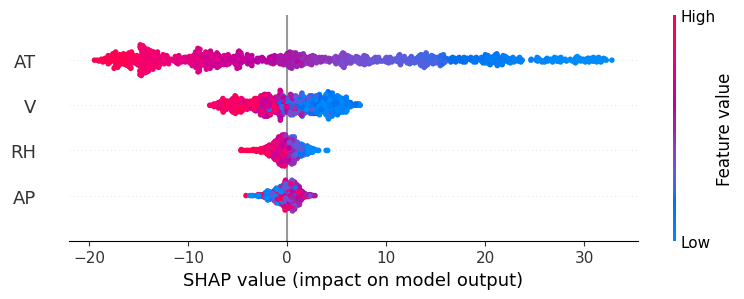

In [8]:
# Import necessary libraries
import shap

# Initialize the SHAP explainer with the final XGBoost model
explainer = shap.Explainer(best_xgb_model, X_test_scaled)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)

# Summary plot of feature importances
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


#### **Model Presentation and Explanation**
6.2.1 Modeling Approach
In this project, we chose Random Forest and XGBoost as our primary algorithms for predicting the energy output of a Combined Cycle Power Plant (CCPP) based on environmental conditions. These models were selected due to their effectiveness with regression tasks and their ability to handle complex, nonlinear relationships within the data.

Random Forest: This ensemble method is known for its robustness and simplicity. It reduces overfitting by averaging the predictions of multiple decision trees, each trained on different data samples.
XGBoost: This gradient boosting algorithm improves prediction accuracy through an iterative process, correcting errors from previous trees. It is highly efficient and offers powerful hyperparameter tuning capabilities, making it well-suited for this regression task.
The task type is regression, as we aim to predict a continuous output (electrical energy in MW) based on the features Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), and Relative Humidity (RH).

6.2.2 Model Building
To determine the best model for this task, we followed a systematic model-building approach:

Baseline Models: Both Random Forest and XGBoost models were initially trained with default settings to establish baseline performance.
Validation Strategy: We split the data into training, validation, and test sets with an 80-10-10 split. This setup allowed us to tune the models on the validation set and test them on unseen data for final performance evaluation.
Hyperparameter Tuning:
For Random Forest, we used a grid search to tune parameters like n_estimators, max_depth, and min_samples_split.
For XGBoost, we used grid search to optimize n_estimators, max_depth, learning_rate, and colsample_bytree.
Model Comparison: After tuning, we compared both models based on performance metrics on the validation set. XGBoost showed slightly better performance, so it was selected as the final model.
6.2.3 Model Evaluation
The final XGBoost model was evaluated on the test set using the following metrics:

Mean Absolute Error (MAE): 2.02 MW
Root Mean Squared Error (RMSE): 2.97 MW
R-squared (R²): 0.970
These metrics confirm the model’s ability to generalize well on new data. The low MAE and RMSE values indicate high accuracy, while the high R² value (97.0%) suggests that the model captures most of the variance in energy output.

6.2.4 Model Interpretation
To interpret the model’s predictions, we conducted a feature importance analysis using SHAP (SHapley Additive exPlanations). SHAP values helped us understand the impact of each feature on the model's predictions:

Temperature (AT): The most influential feature, where higher temperatures decrease predicted power output, while lower temperatures increase it.
Exhaust Vacuum (V): The second most impactful feature, with higher values reducing power output predictions.
Relative Humidity (RH): Shows a non-linear impact, suggesting a more complex relationship with power output.
Ambient Pressure (AP): Has a smaller impact on predictions, with a narrow spread of SHAP values.
Implications for CCPP Energy Optimization
The feature importance analysis provides actionable insights for optimizing power output at a Combined Cycle Power Plant. For example:

Monitoring Temperature and Exhaust Vacuum closely can help predict power output levels, allowing the plant to adjust operating parameters in response to environmental conditions.
Understanding the effect of Relative Humidity and Ambient Pressure enables more nuanced adjustments, potentially helping the plant to maintain stable power output across different weather conditions.
This model interpretation improves the explainability of our predictions and highlights critical environmental factors affecting power output, supporting the power plant's goal of optimizing energy production efficiency.